# Step 1: Importing the necessary libraries 

In [1]:
import pandas as pd
import numpy as np

# Step 2: Converting data types of variables which are misclassified.
        (values are already in numeric so we don't need it)

# Step 3 : importing CSV file


In [2]:
df = pd.read_csv('churn.csv')
df.head(5)

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.320,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.700,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.320,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2,3,50.00,51.956,-0.18,4,...,0.066602,0.437088,7,2,11,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3,2,22.50,66.886,0.01,4,...,0.219821,0.585977,6,1,14,3.85,3.87,21.998905,0.683105,0.10


# Step 4: Removing Duplicate records

In [3]:
print("Number of records before removing duplicates:", len(df))
df.drop_duplicates(inplace=True)
print("Number of records after removing duplicates:", len(df))

Number of records before removing duplicates: 25000
Number of records after removing duplicates: 25000


# Step 5: Removing Unique value variables

In [4]:
num_columns_before = len(df.columns)
for column in df.columns:
    if len(df[column].unique()) == 1:
        df.drop(column, axis=1, inplace=True)
num_columns_after = len(df.columns)
print("Number of columns before removing unique value variables:", num_columns_before)
print("Number of columns after removing unique value variables:", num_columns_after)

Number of columns before removing unique value variables: 111
Number of columns after removing unique value variables: 111


# Step 6: Removing Zero variance variables

In [5]:
num_columns_before = len(df.columns)
for column in df.columns:
    if df[column].var() == 0:
        df.drop(column, axis=1, inplace=True)
num_columns_after = len(df.columns)
print("Number of columns before removing zero variance variables:", num_columns_before)
print("Number of columns after removing zero variance variables:", num_columns_after)

Number of columns before removing zero variance variables: 111
Number of columns after removing zero variance variables: 111


# Step 5: Outlier Treatment

In [6]:
df.describe()

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,-0.028327,3.254720,...,0.538407,0.485523,5.731280,1.797320,8.382160,8.008660,12.540182,53.594165,0.483975,9.951366
std,2.727916,276.075983,4.212452,6.318992,2.184444,28.061435,67.921490,231.321064,0.354573,1.193271,...,0.209203,0.271146,1.936848,3.048943,8.961016,6.152429,11.540611,21.408486,0.292349,17.648128
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,-5.090000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,-0.160000,3.000000,...,0.394227,0.274034,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,0.251304,1.970000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,-0.020000,4.000000,...,0.539354,0.476759,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,0.477621,5.380000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,0.110000,4.000000,...,0.682695,0.694104,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,0.716538,11.400000
max,316.860000,5702.924300,153.221695,170.200441,7.000000,622.000000,2249.000000,3767.565000,5.000000,4.000000,...,1.000000,1.000000,7.000000,14.000000,30.000000,171.780000,386.480000,100.000000,1.000000,585.500000


Column 's6.new.rev.p2.m2': 1024 outliers detected
Column 's1.new.rev.m1': 1335 outliers detected
Column 's3.og.rev.4db.p5': 1543 outliers detected
Column 's3.new.rev.4db.p5': 1934 outliers detected
Column 's4.usg.ins.p2': 2452 outliers detected
Column 's4.og.unq.any.p2': 1187 outliers detected
Column 's2.rch.val.p6': 1677 outliers detected
Column 's1.og.rev.all.m1': 1506 outliers detected
Column 's8.new.rev.p6': 2216 outliers detected
Column 's4.loc.ic.ins.p1': 2873 outliers detected
Column 's8.mbl.p2': 4593 outliers detected
Column 's2.rch.val.l67': 1715 outliers detected
Column 's7.s4.day.no.mou.p2.p4': 0 outliers detected
Column 's3.new.rev.p3': 1722 outliers detected
Column 's7.s5.s4.day.nomou.p4': 0 outliers detected
Column 's8.og.rev.p3': 2568 outliers detected
Column 's8.ic.mou.all.p3': 2659 outliers detected
Column 'target': 0 outliers detected
Column 's7.new.rev.p2.p6': 421 outliers detected
Column 's6.rtd.mou.p2.m2': 1114 outliers detected
Column 's7.rtd.mou.p2.p6': 563 outli

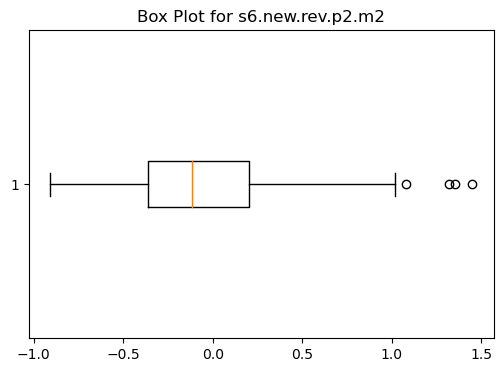

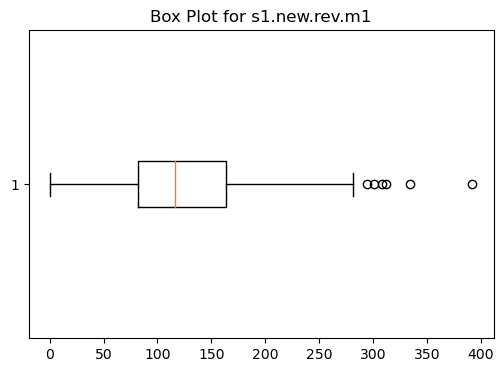

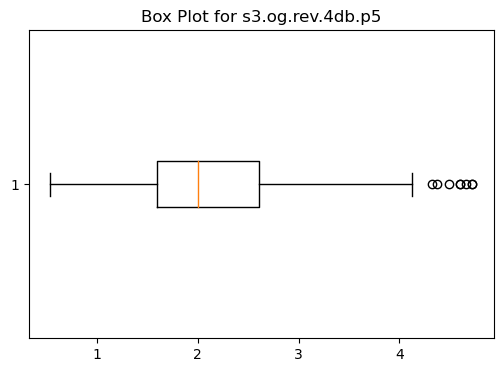

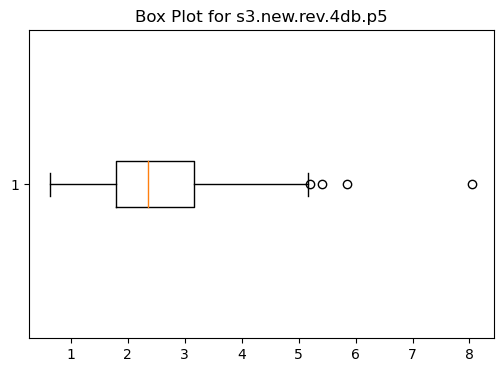

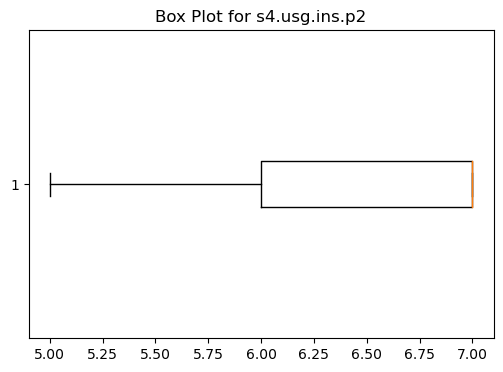

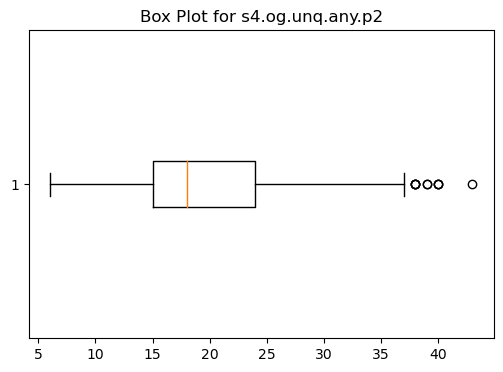

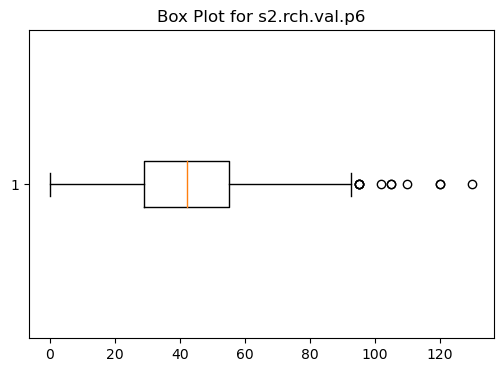

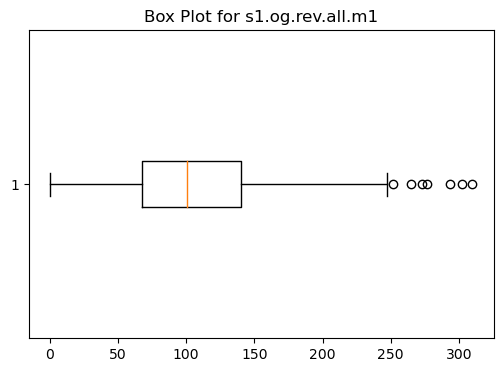

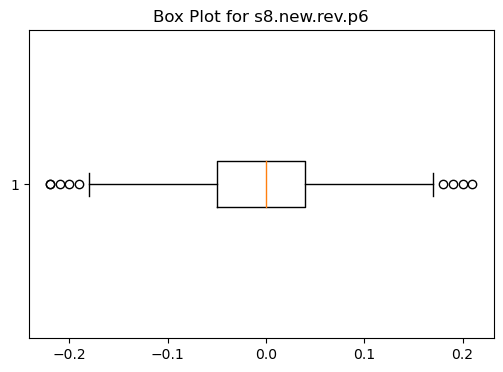

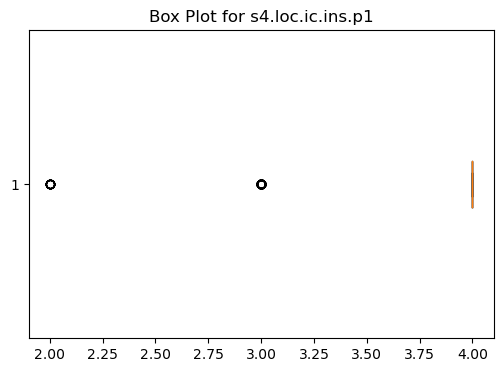

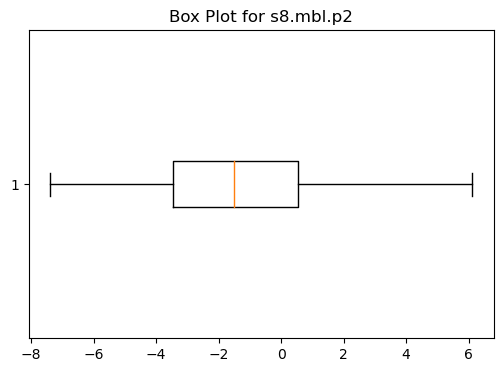

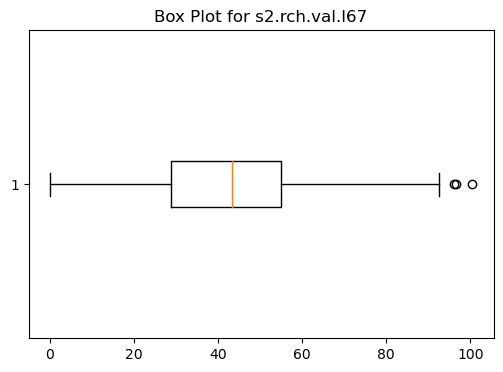

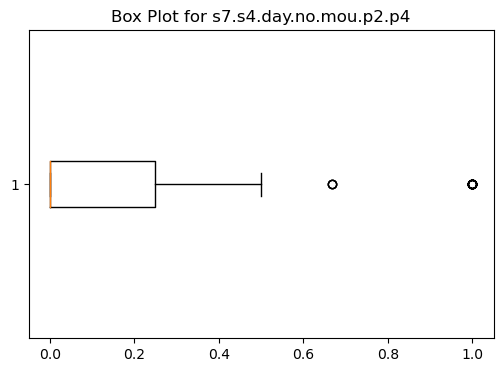

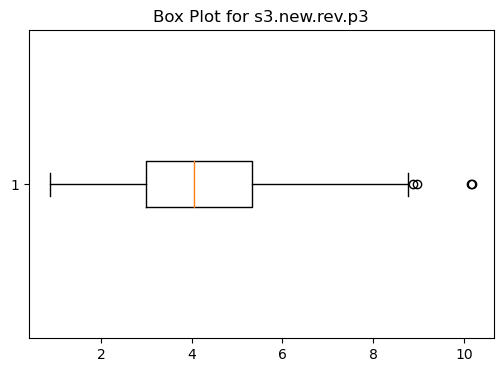

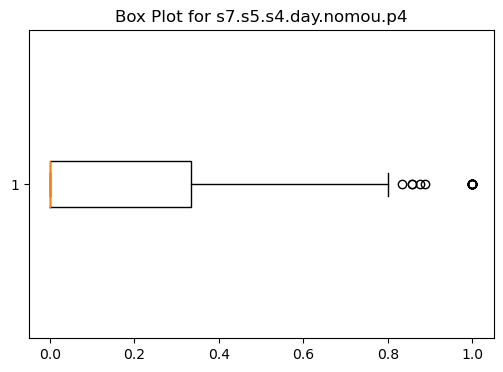

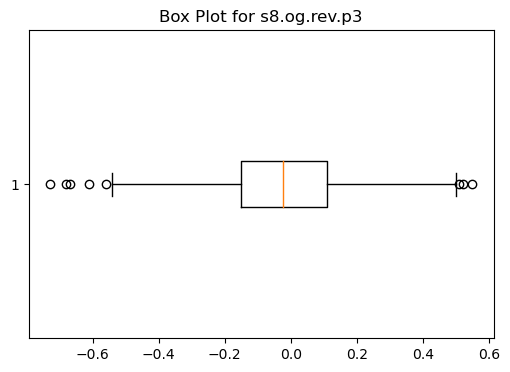

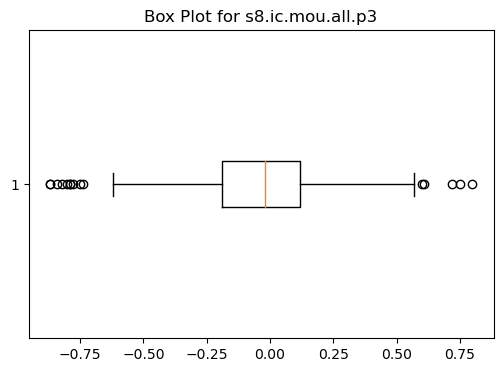

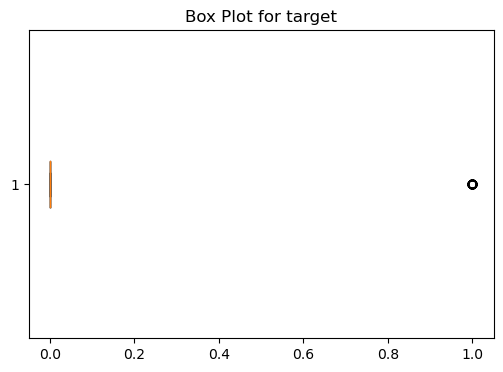

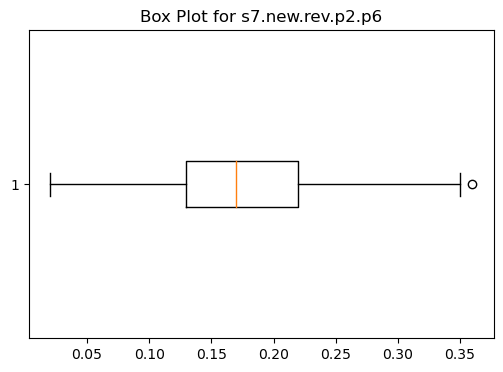

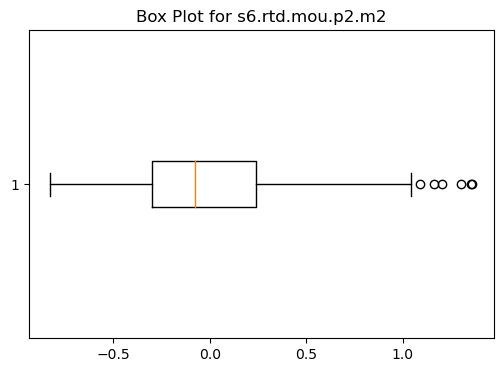

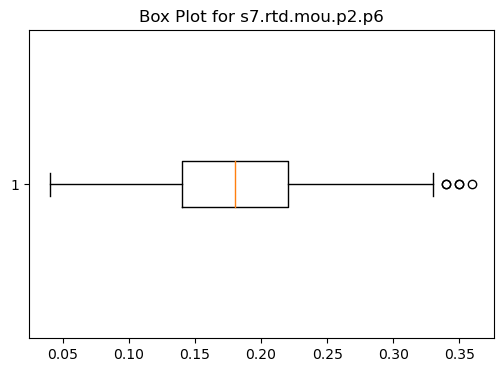

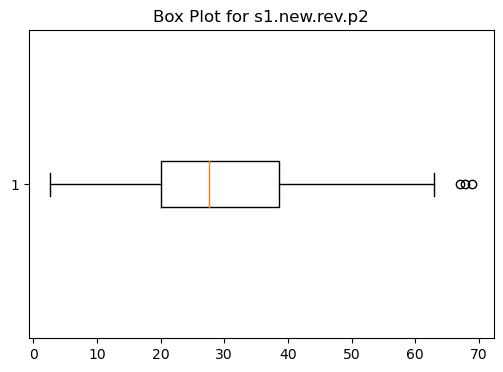

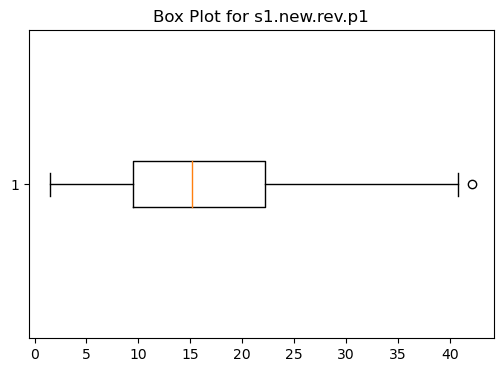

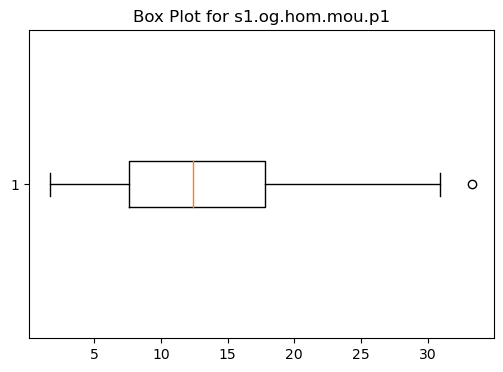

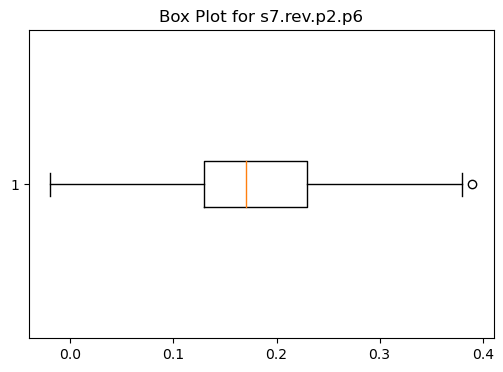

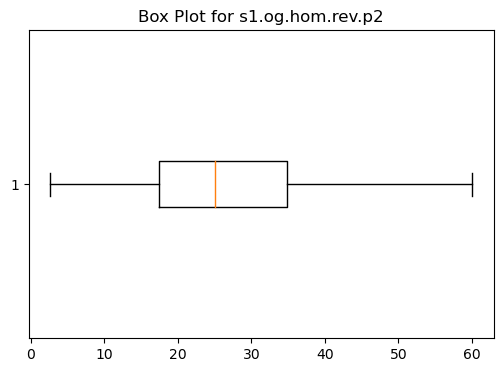

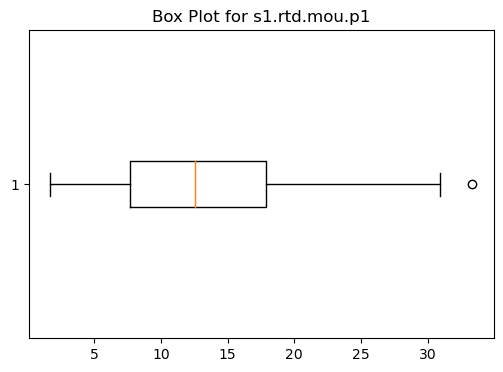

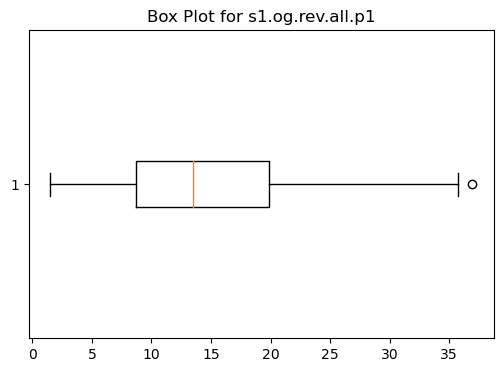

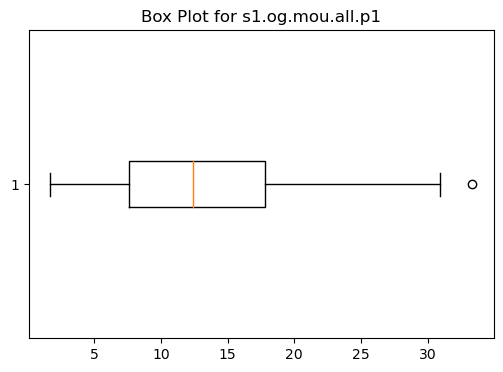

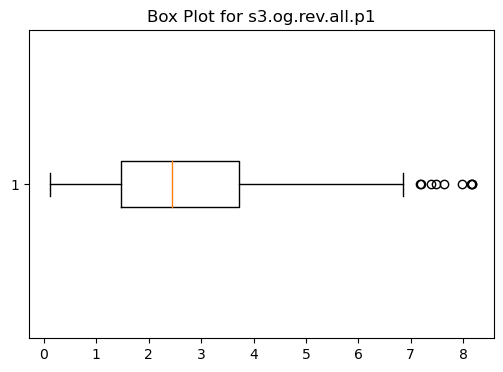

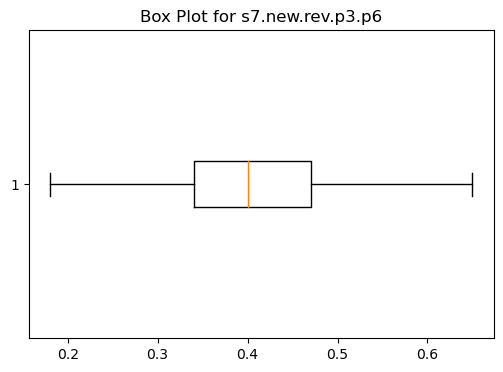

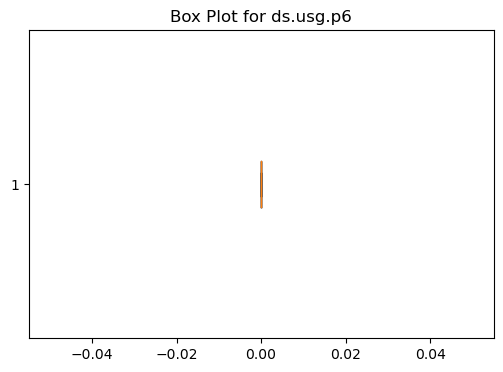

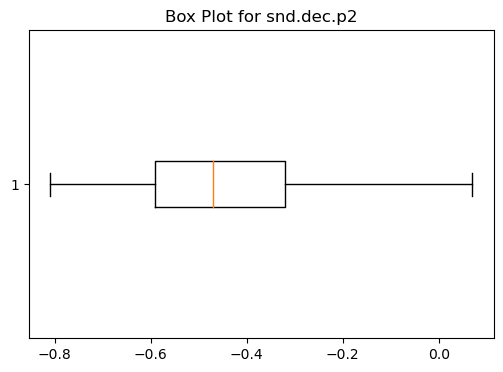

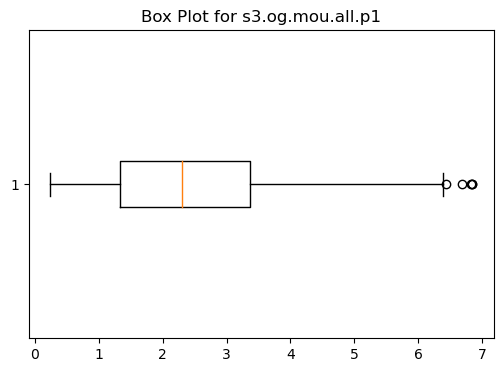

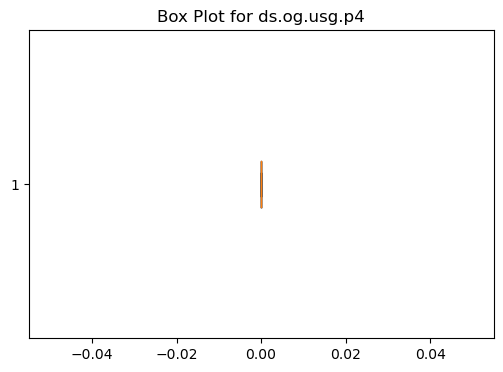

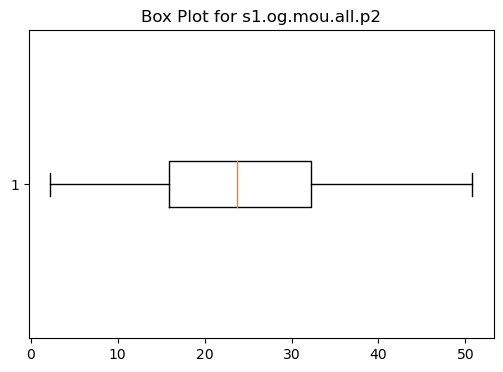

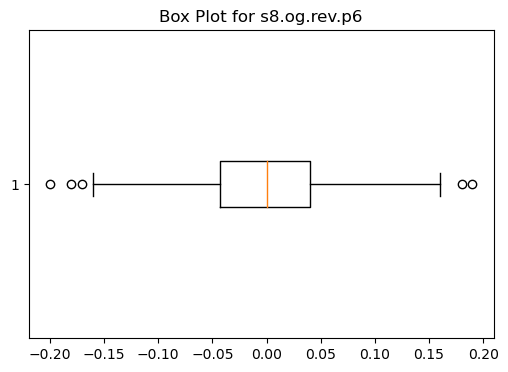

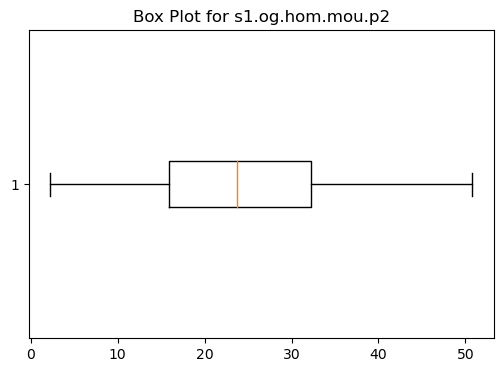

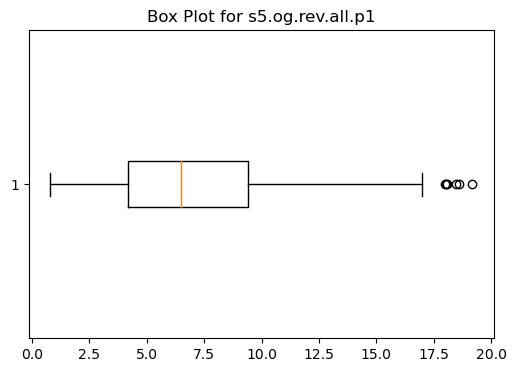

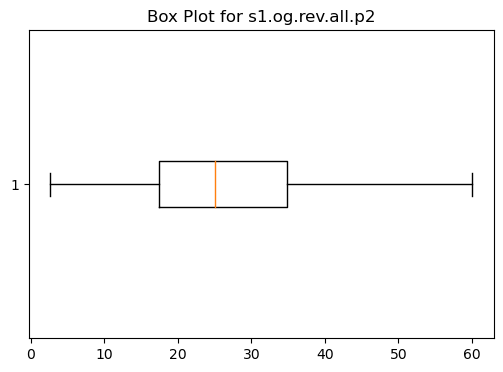

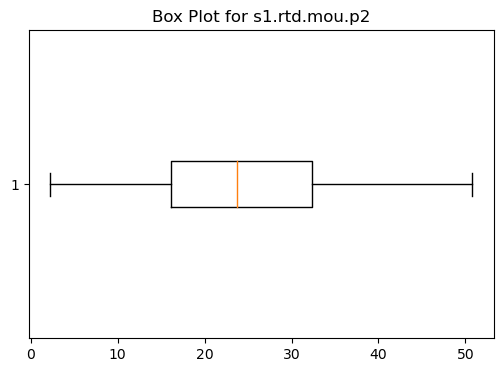

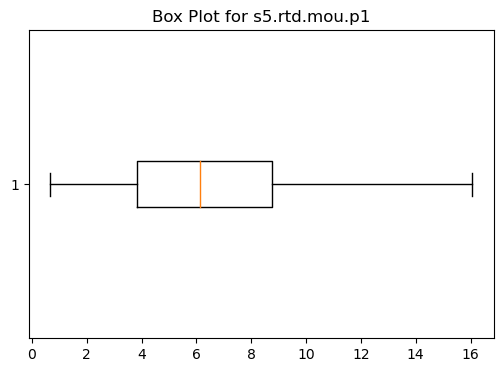

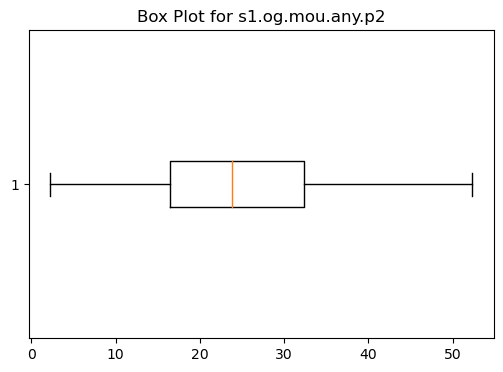

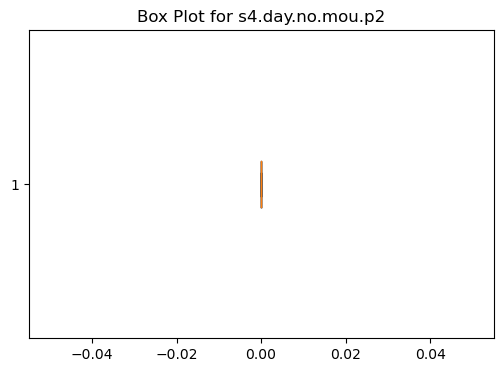

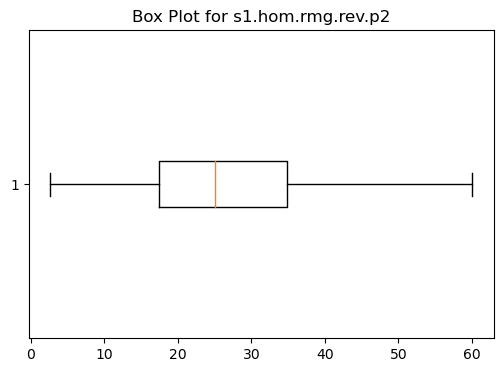

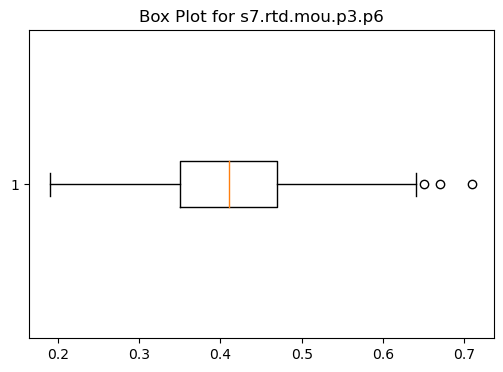

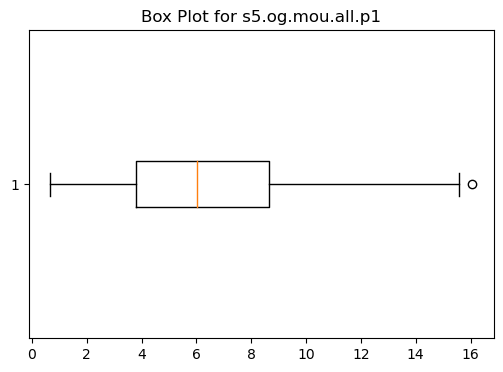

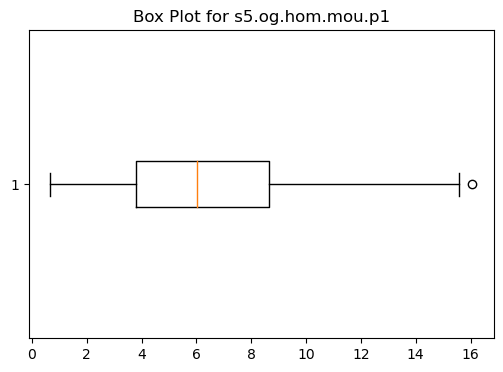

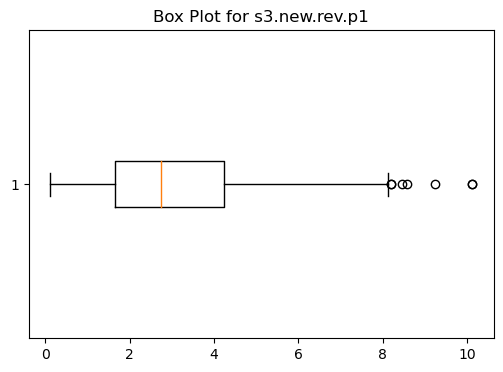

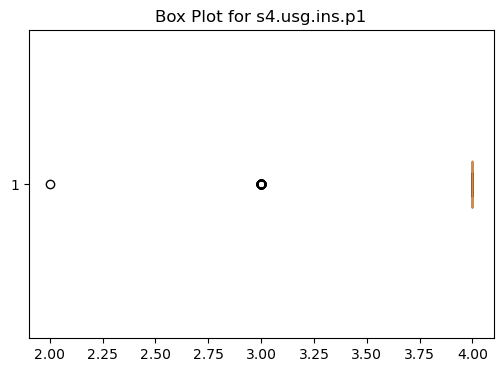

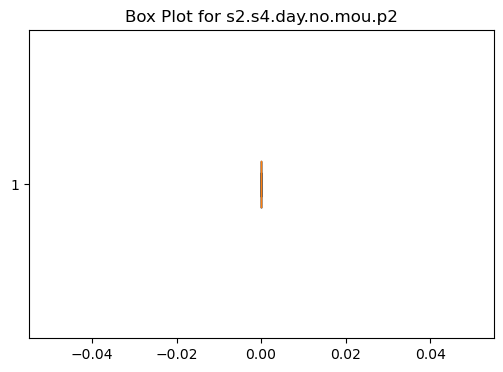

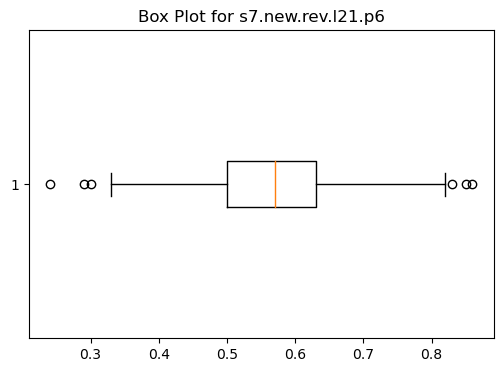

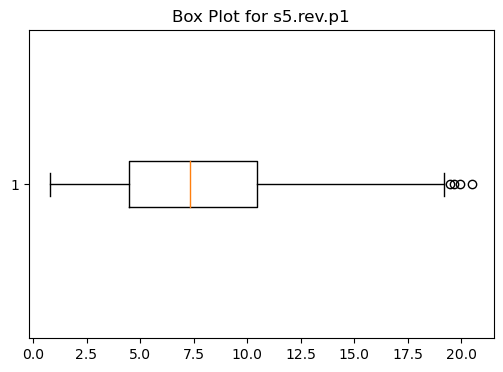

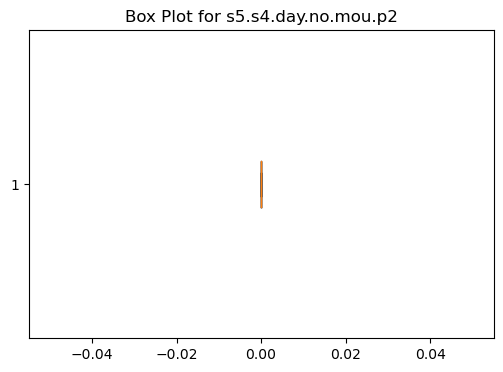

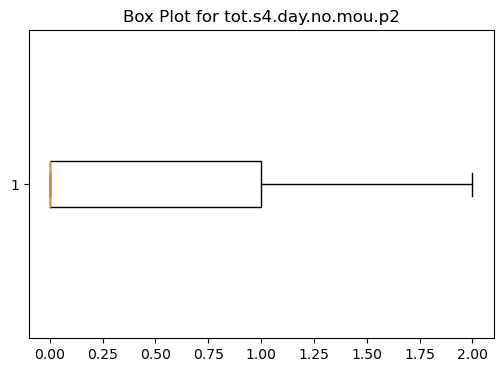

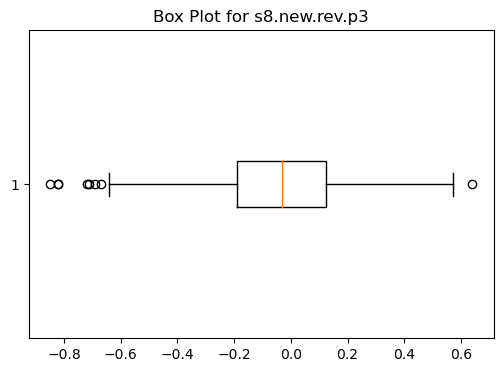

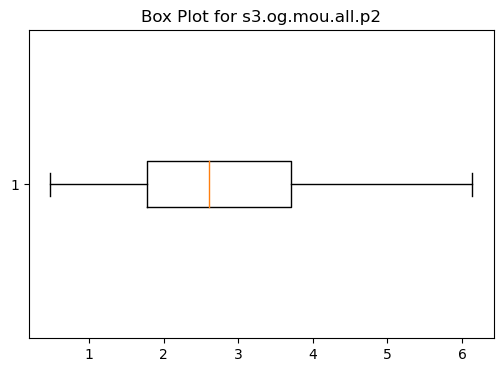

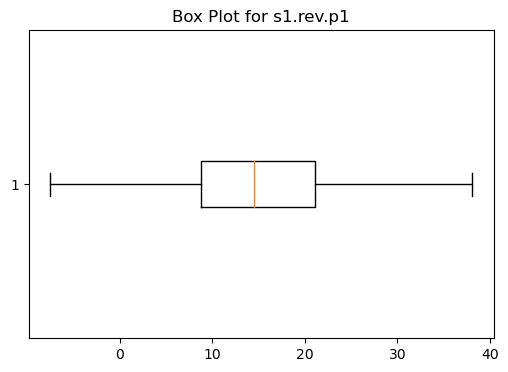

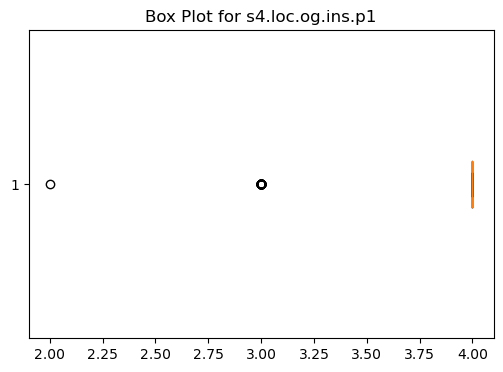

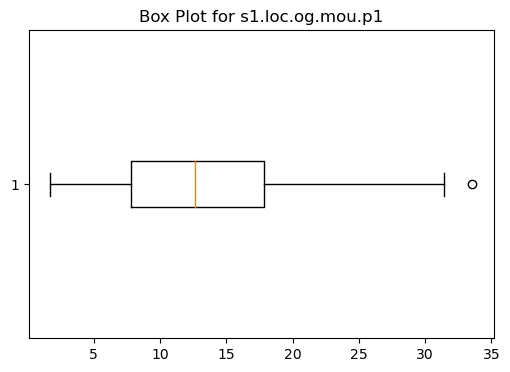

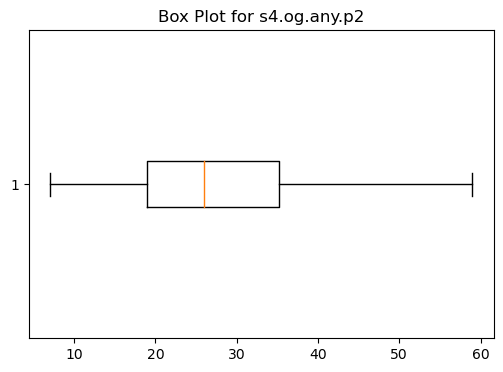

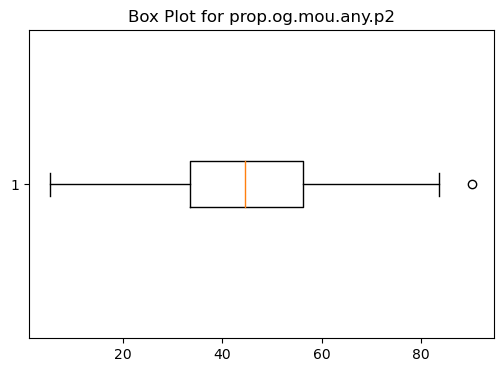

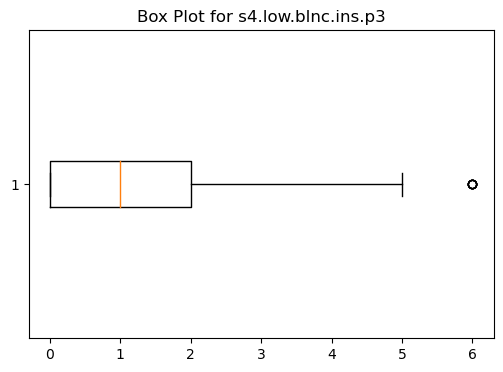

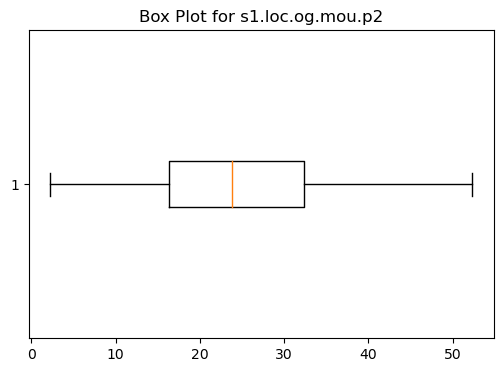

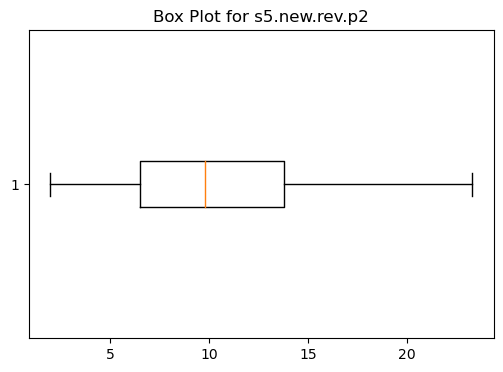

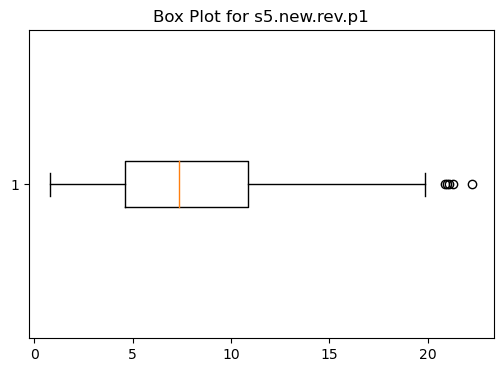

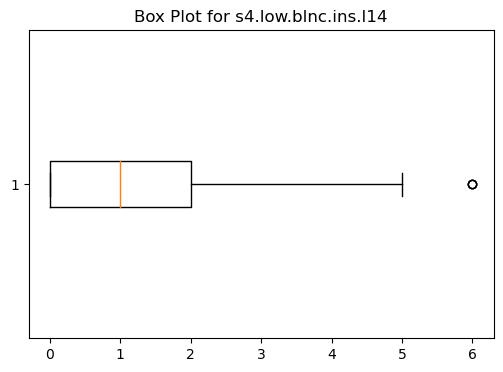

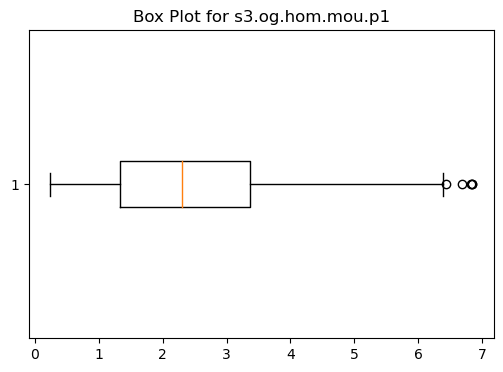

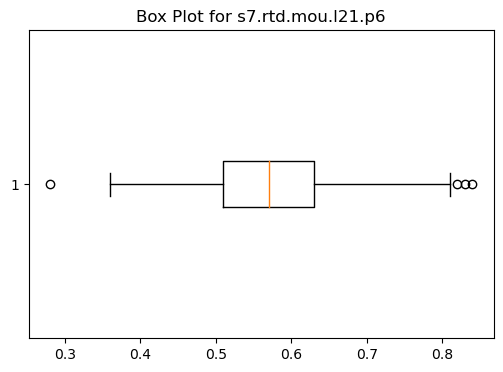

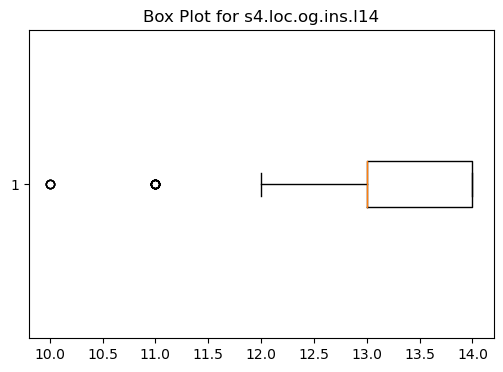

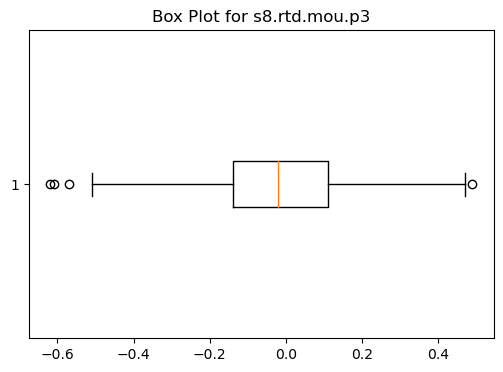

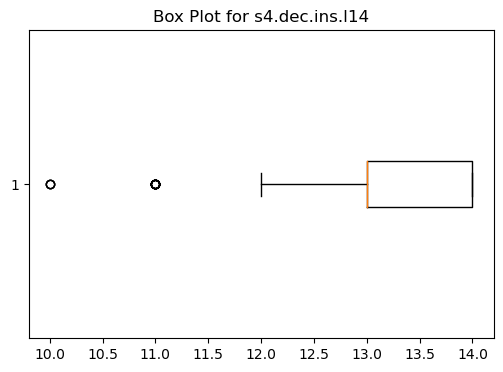

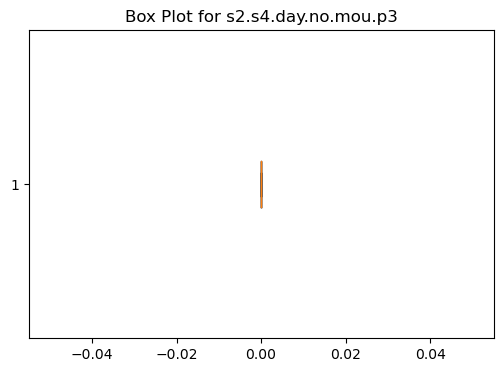

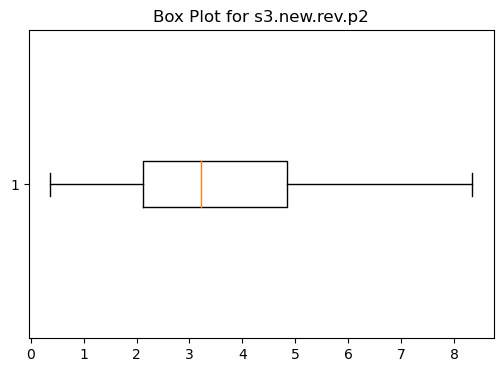

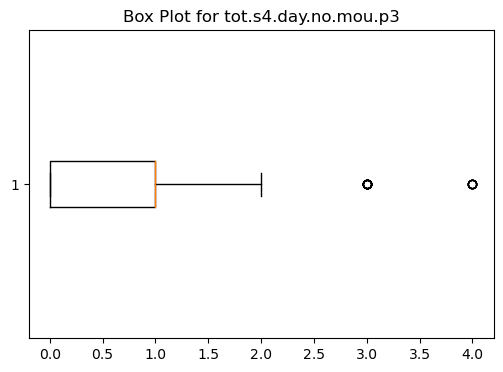

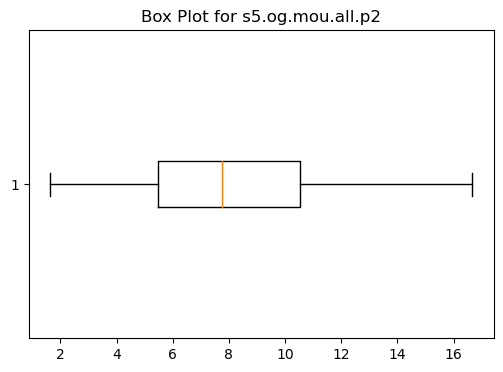

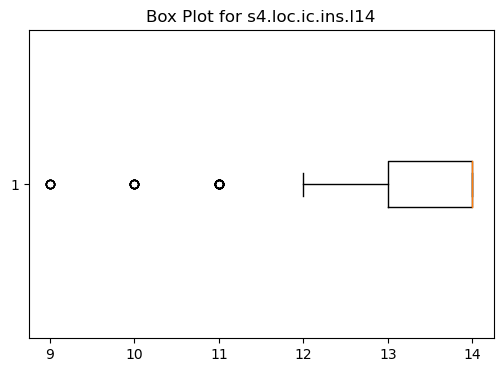

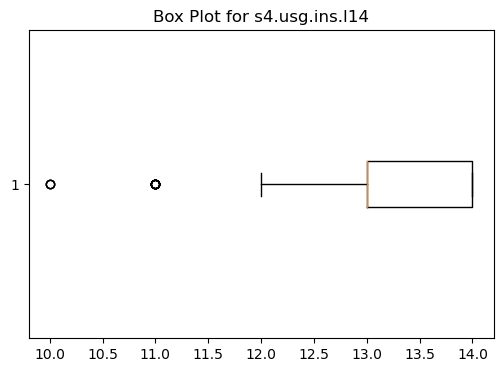

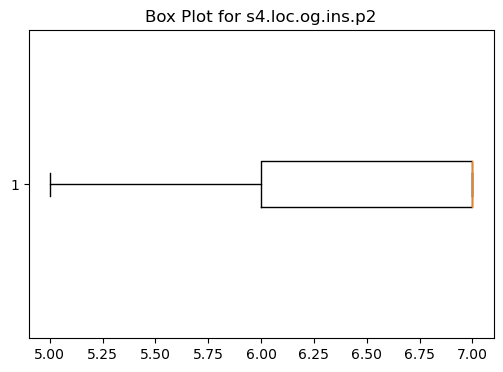

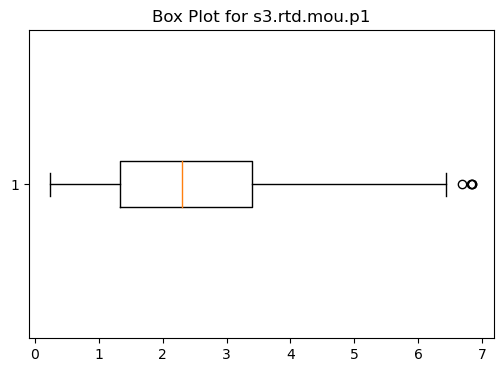

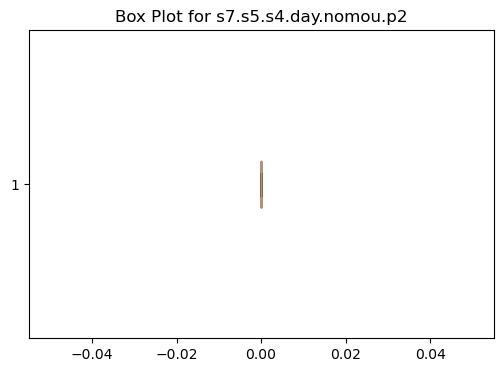

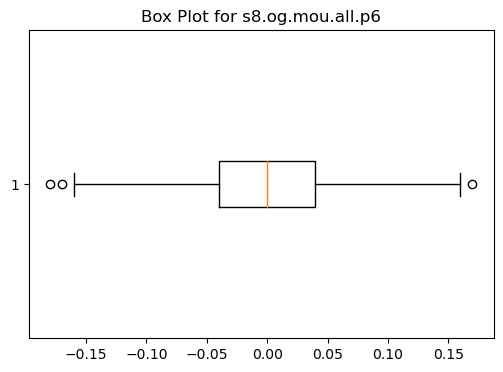

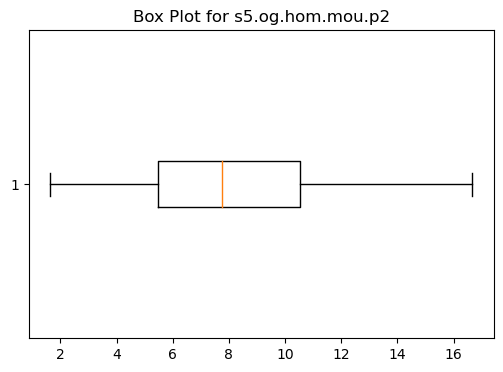

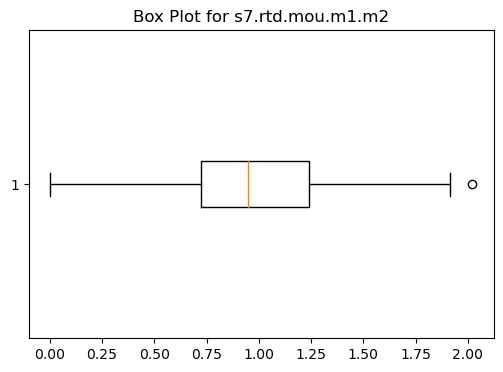

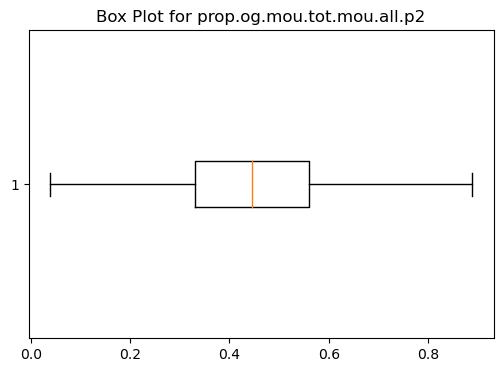

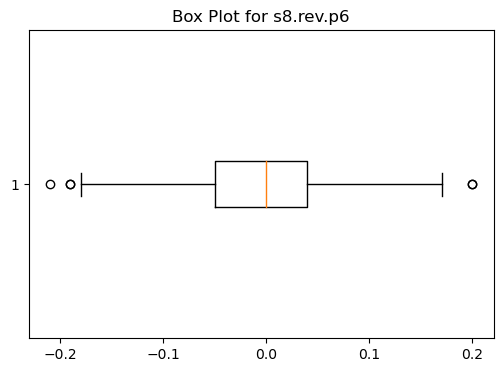

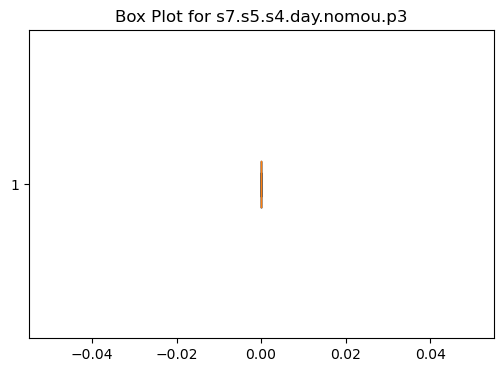

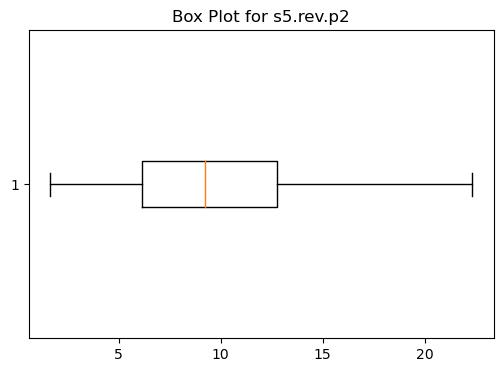

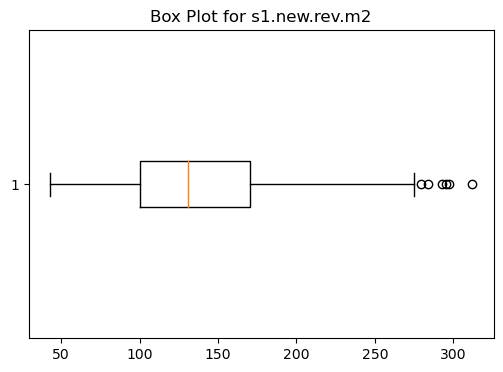

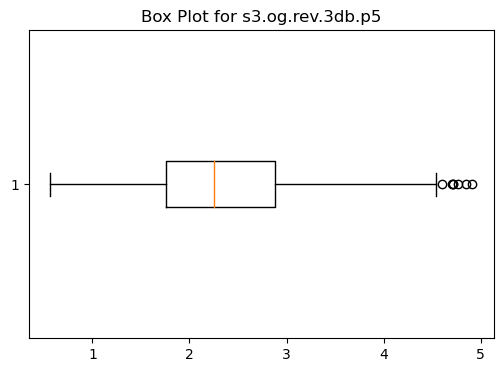

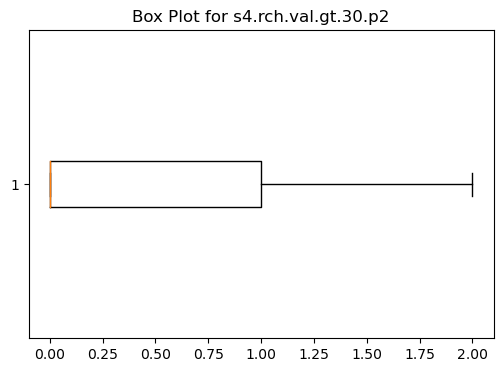

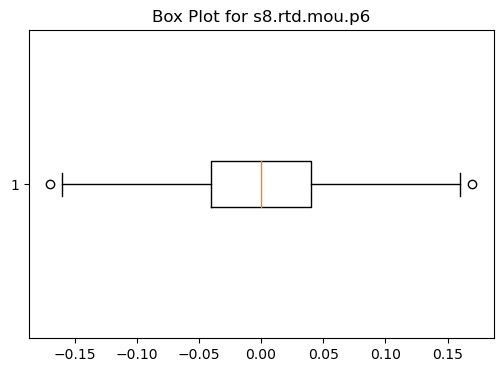

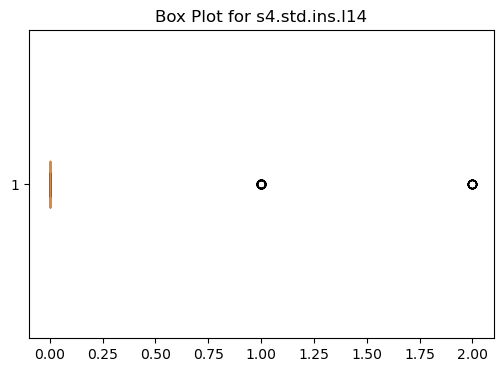

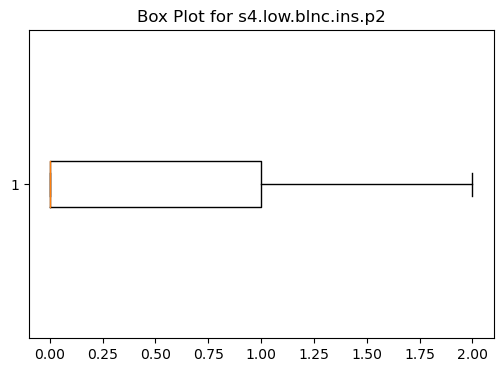

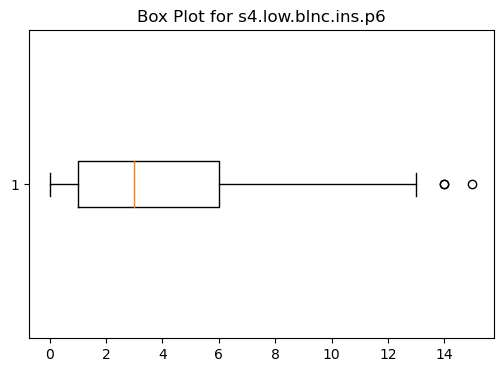

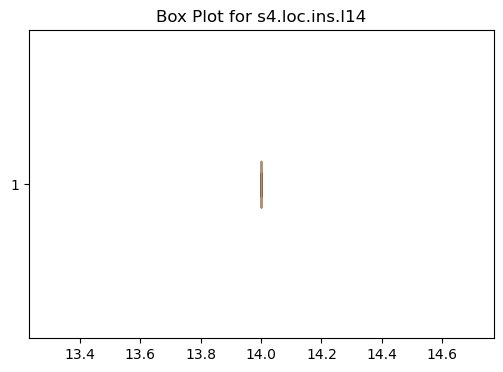

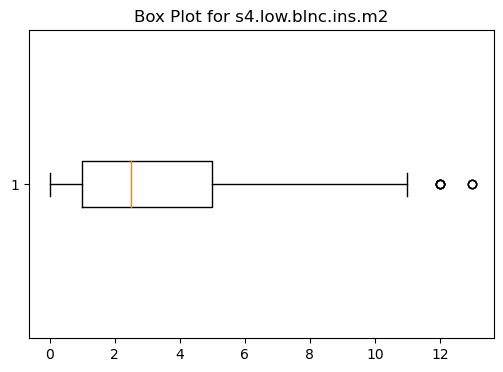

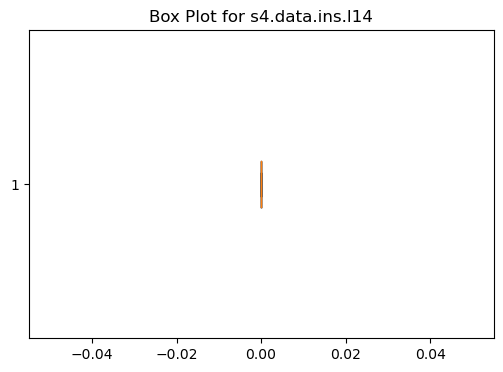

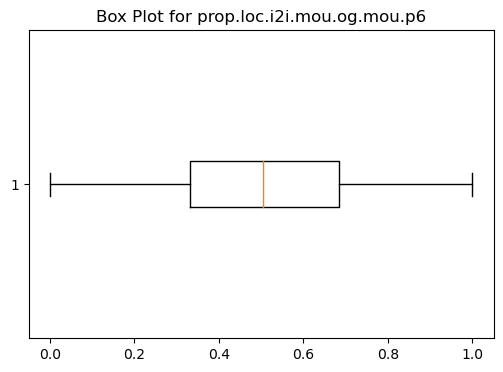

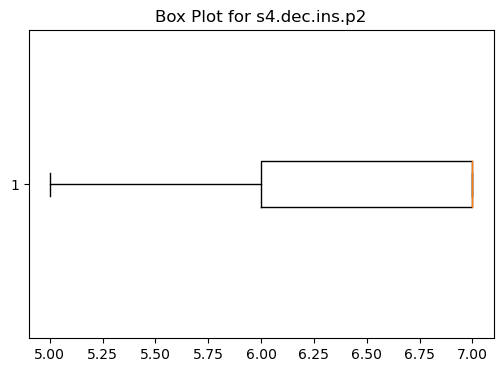

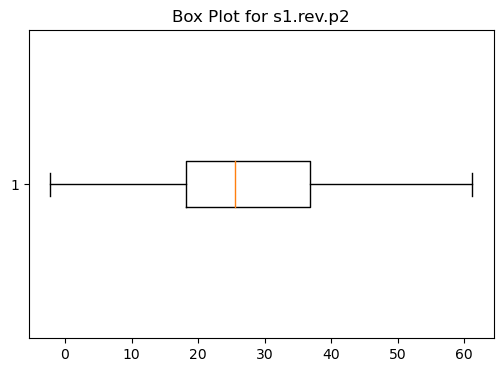

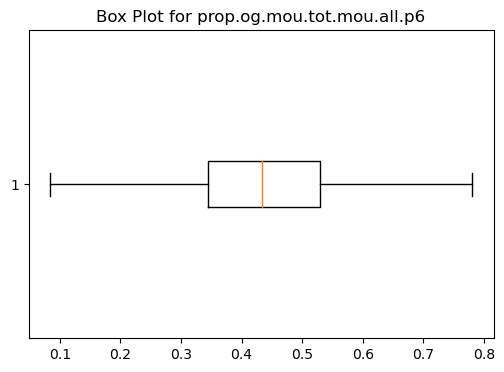

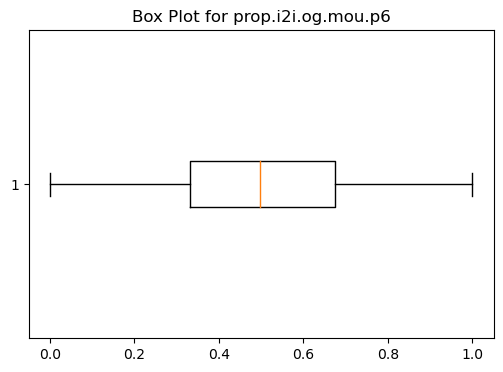

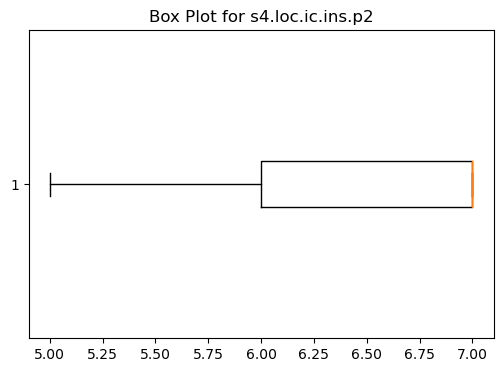

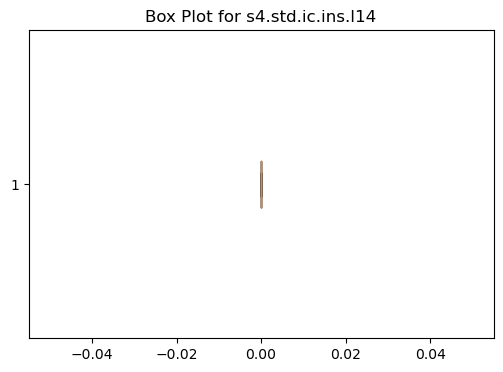

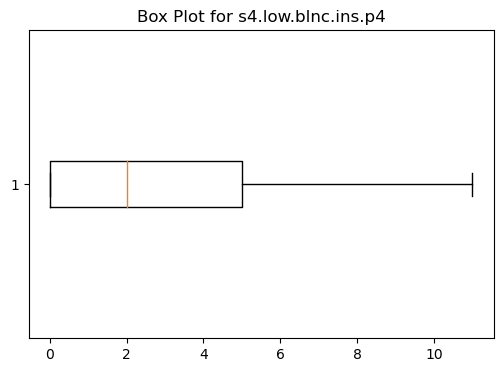

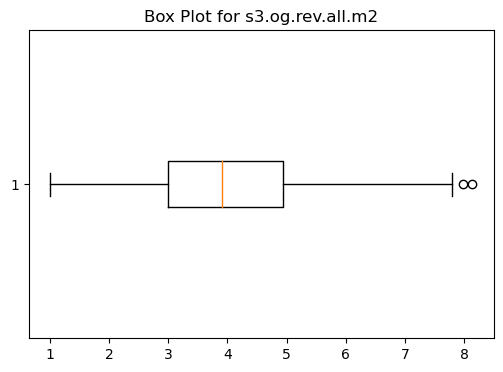

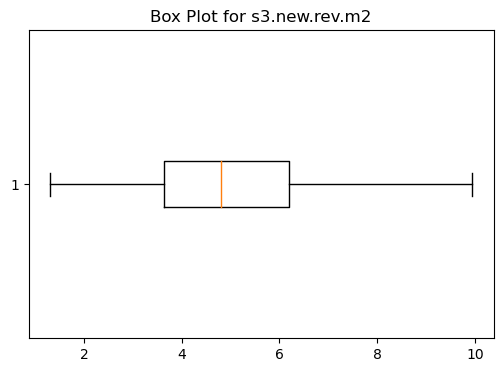

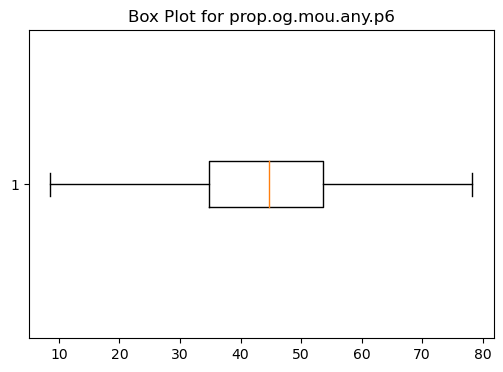

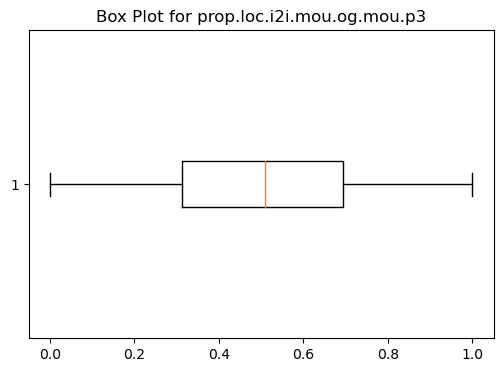

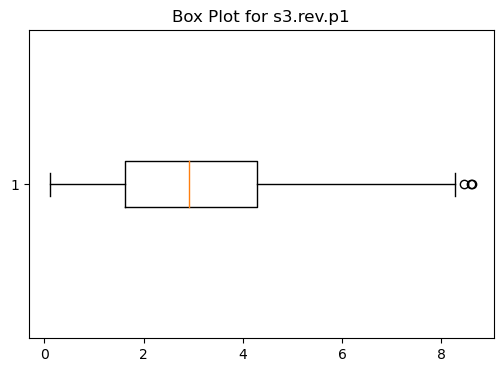

In [7]:
import matplotlib.pyplot as plt

def detect_outliers_iqr(data_column):
    Q1 = np.percentile(data_column, 25)
    Q3 = np.percentile(data_column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data_column < lower_bound) | (data_column > upper_bound)

# Detection of outliers
outliers = {}
for column in df.select_dtypes(include=np.number):
    outliers[column] = detect_outliers_iqr(df[column])

#outliers counts
outlier_counts = {col: outliers[col].sum() for col in outliers}
for col, count in outlier_counts.items():
    print(f"Column '{col}': {count} outliers detected")

# Removing outliers
def remove_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        outlier_mask = detect_outliers_iqr(df[column])
        df = df[~outlier_mask]
    return df
df = remove_outliers(df)
print("Number of records after outlier treatment:", len(df))

for column in df.select_dtypes(include=np.number):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column], vert=False)
    plt.title(f"Box Plot for {column}")
    plt.show()

In [8]:
df.shape

(360, 111)

# Step 6: Missing Value Treatment

In [9]:
# Removing records if NA's are less than 5%
num_records_before = len(df)
df.dropna(thresh=len(df.columns) * 0.95, inplace=True)
num_records_after = len(df)
print("Number of records before removing if NA's are less than 5%:", num_records_before)
print("Number of records after removing if NA's are less than 5%:", num_records_after)

# Removing records if NA's are 50% in any variable
num_columns_before = len(df.columns)
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)
num_columns_after = len(df.columns)
print("Number of columns before removing if NA's are 50%:", num_columns_before)
print("Number of columns after removing if NA's are 50%:", num_columns_after)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

for column in numeric_cols:
    df[column].fillna(df[column].median(), inplace=True)

for column in categorical_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

Number of records before removing if NA's are less than 5%: 360
Number of records after removing if NA's are less than 5%: 360
Number of columns before removing if NA's are 50%: 111
Number of columns after removing if NA's are 50%: 111


# Step 7: Removing the highly correlated variables

In [10]:
correlation_matrix = df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
df.drop(to_drop, axis=1, inplace=True)
print("Number of columns after removing highly correlated variables:", len(df.columns))

Number of columns after removing highly correlated variables: 47


# Step 8: Multicollinearity (VIF > 5)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif_data["VIF"] = vif_data["VIF"].replace([np.inf, -np.inf], 9999)
    return vif_data

if 'dependent_variable' in df.columns:
    X = df.drop(columns=['dependent_variable'])
else:
    X = df.copy()  
vif_df = calculate_vif(X)
print("Number of columns after removing multicollinearity:", len(df.columns))

numerator = np.array([1, 2, 3])
denominator = np.array([0, 1, 2])

#dividing by 0
mask = denominator != 0
result = np.zeros_like(numerator, dtype=float) 
result[mask] = numerator[mask] / denominator[mask]
result[~mask] = np.nan  

# Checking NaN values
result[np.isnan(result)] = np.nan

print(result)

Number of columns after removing multicollinearity: 47
[nan 2.  1.5]


C:\Users\amit0\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 226 to 24943
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   s6.new.rev.p2.m2            360 non-null    float64
 1   s1.new.rev.m1               360 non-null    float64
 2   s3.og.rev.4db.p5            360 non-null    float64
 3   s3.new.rev.4db.p5           360 non-null    float64
 4   s4.usg.ins.p2               360 non-null    int64  
 5   s4.og.unq.any.p2            360 non-null    int64  
 6   s2.rch.val.p6               360 non-null    float64
 7   s8.new.rev.p6               360 non-null    float64
 8   s4.loc.ic.ins.p1            360 non-null    int64  
 9   s8.mbl.p2                   360 non-null    float64
 10  s7.s4.day.no.mou.p2.p4      360 non-null    float64
 11  s3.new.rev.p3               360 non-null    float64
 12  s7.s5.s4.day.nomou.p4       360 non-null    float64
 13  s8.og.rev.p3                360 non-

In [13]:
df.shape

(360, 47)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)


Accuracy: 86.11111111111111


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning:", accuracy*100)


Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 150}
Accuracy after tuning: 84.72222222222221
